In [1]:
import feather
import numpy as np
import scanpy as sc
import pandas as pd
from anndata import AnnData

In [27]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

In [3]:
#read in gene expression matrix
all_cells_path = '../data/processed/all_cells.feather'
all_cells_df =  feather.read_dataframe(all_cells_path)

In [21]:
#read in annoations
annot_path = "../data/processed/all_cells_annotation.csv"
annot_df = pd.read_csv(annot_path,index_col=0)

In [24]:
annot_df = annot_df.drop('Unnamed: 0.1',1)

In [26]:
annot_df.head()

,cell_id,nUMIs,nGenes,doublet_score,region,full_id
0,AAACCCACAGTCTACA,44976,5130,0.387876,caudate,caudate_AAACCCACAGTCTACA
1,AAACCCAGTGGACCAA,123667,7963,0.195725,caudate,caudate_AAACCCAGTGGACCAA
2,AAACGAAAGAGAGCCT,26469,3380,0.179471,caudate,caudate_AAACGAAAGAGAGCCT
3,AAACGAACACTGTCCT,30046,3540,0.192417,caudate,caudate_AAACGAACACTGTCCT
4,AAACGAATCTGGGAGA,52628,5692,0.267317,caudate,caudate_AAACGAATCTGGGAGA


In [29]:
#remove doublets as annoated by scds previosly
singlets = annot_df["doublet_score"].values<1.0
singlets_df = all_cells_df.loc[singlets,:]
singlets_annot = annot_df.loc[singlets,:]

In [36]:
#create an annotated dataframe object and add annotation columns
striatum_ann = AnnData(singlets_df)
striatum_ann.var_names = all_cells_df.columns.values
striatum_ann.obs_names = singlets_annot["full_id"].values
striatum_ann.obs["nUMIs"] = singlets_annot["nUMIs"].values
striatum_ann.obs["nGenes"] = singlets_annot["nGenes"].values

striatum_ann.obs["region"] = pd.Categorical(singlets_annot["region"].values,np.unique(singlets_annot["region"].values))

striatum_ann.obs["doublet_score"] = singlets_annot["doublet_score"].values

Transforming to str index.


In [37]:
#for preclustering we will use CPM normalization
sc.pp.normalize_per_cell(striatum_ann, counts_per_cell_after=1e6)
sc.pp.log1p(striatum_ann)

In [38]:
#we now run pca on the gene expression matrix and construct a knn graph
sc.pp.pca(striatum_ann)
sc.pp.neighbors(striatum_ann)


In [76]:
#we can now cluster the cells via leiden clustering  #https://doi.org/10.1038/s41598-019-41695-z
sc.tl.leiden(striatum_ann, key_added='groups',resolution=0.05)

In [40]:
#we can visualize our clusters with UMAP projection
sc.tl.umap(striatum_ann)

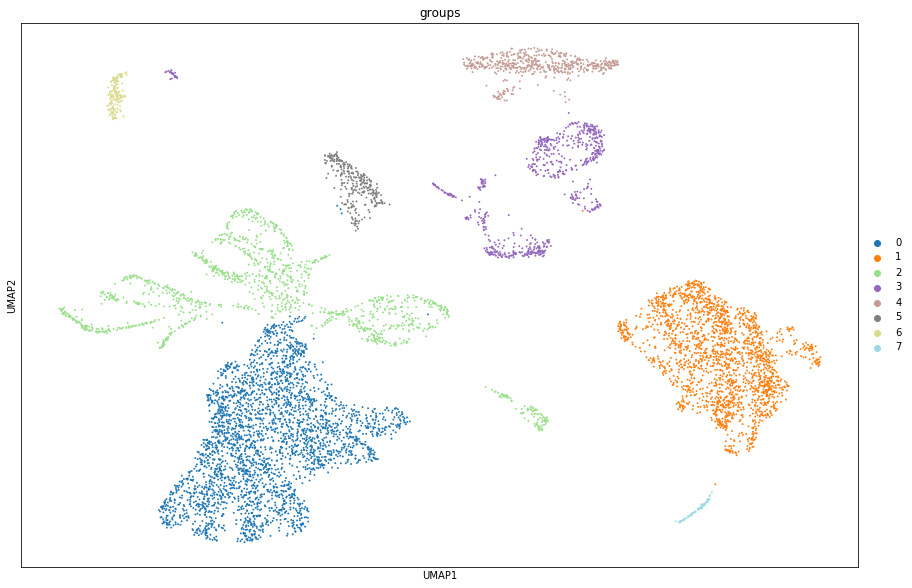

In [78]:
sc.pl.umap(striatum_ann,color="groups",palette="tab20")

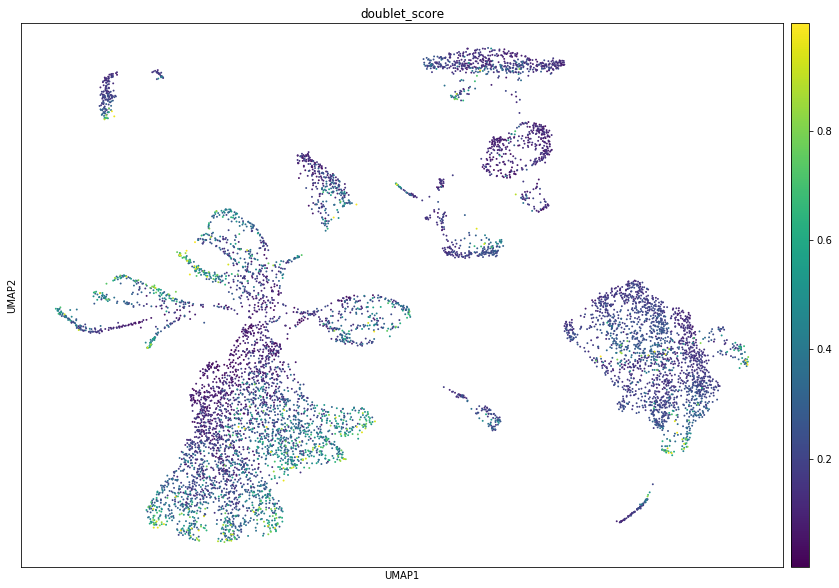

In [63]:
#let's look at doublet statistics for our clusters
sc.pl.umap(striatum_ann,color="doublet_score")

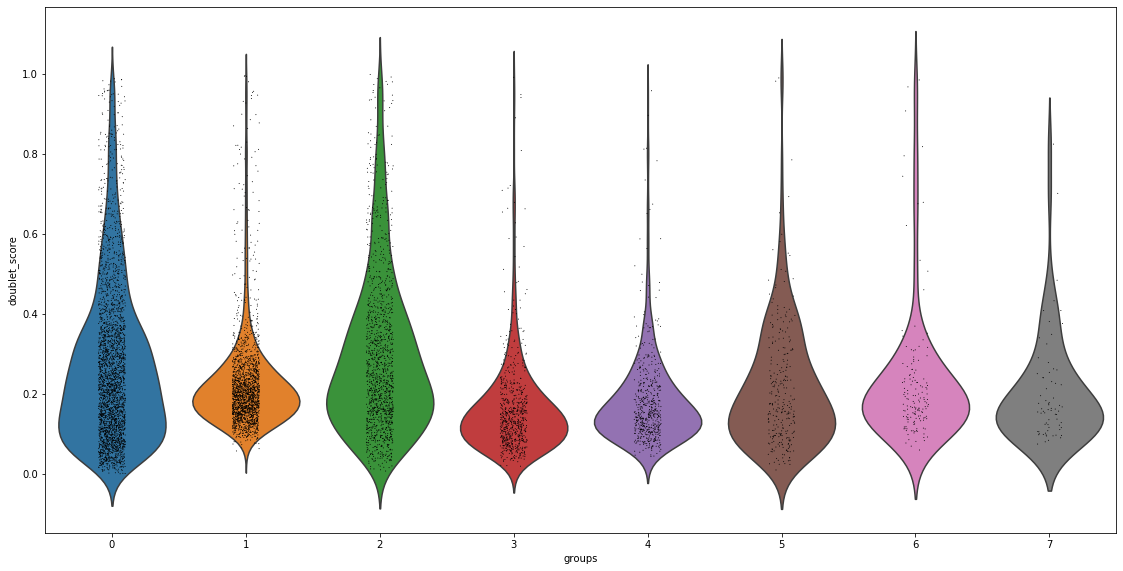

In [81]:
#some clusters seem to have higher doublet scores than others
sc.pl.violin(striatum_ann,keys="doublet_score",groupby="groups")

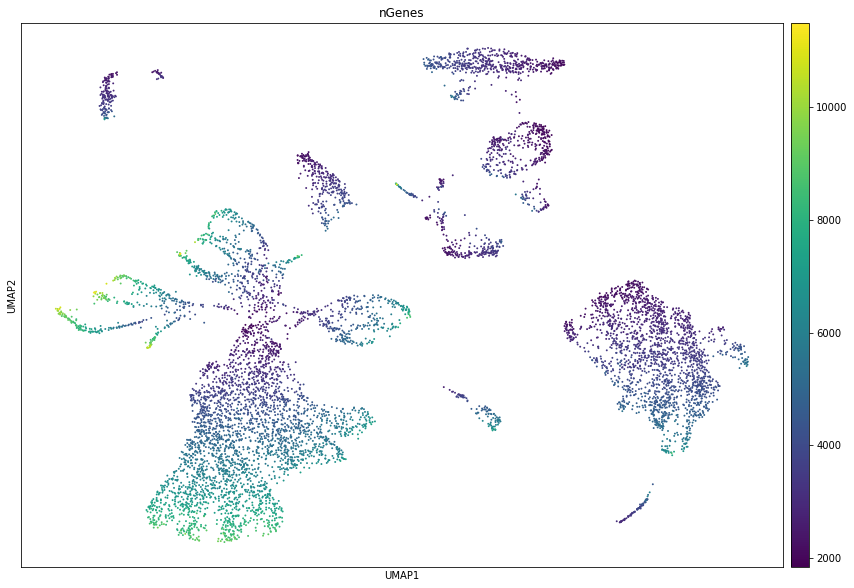

In [67]:
sc.pl.umap(striatum_ann,color="nGenes")

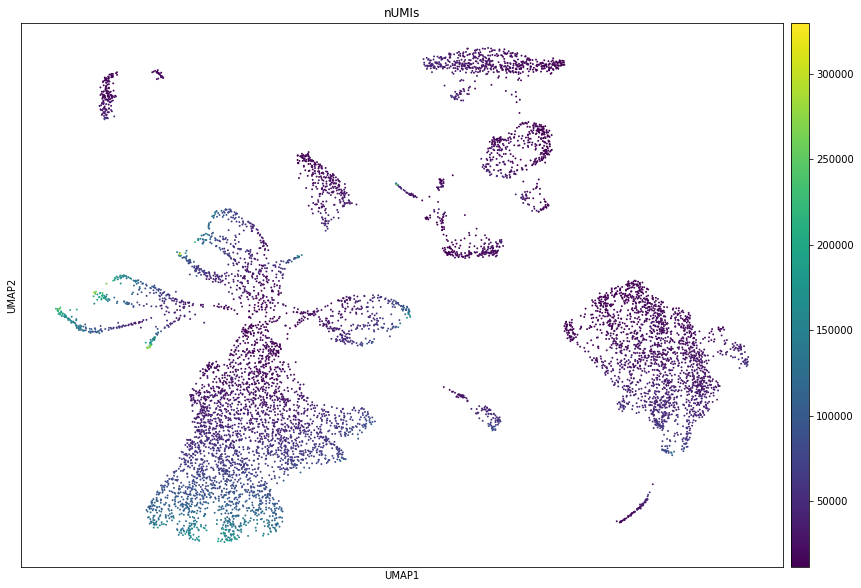

In [68]:
sc.pl.umap(striatum_ann,color="nUMIs")

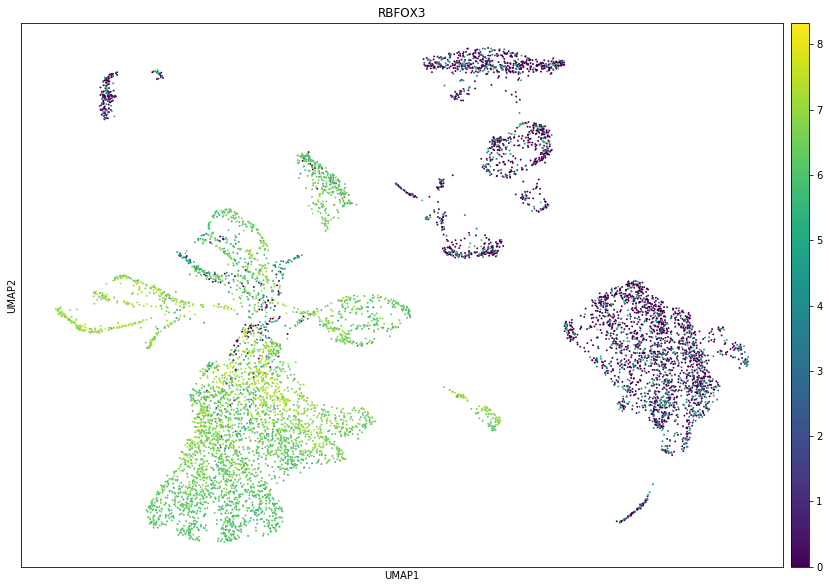

In [69]:
sc.pl.umap(striatum_ann,color="RBFOX3")

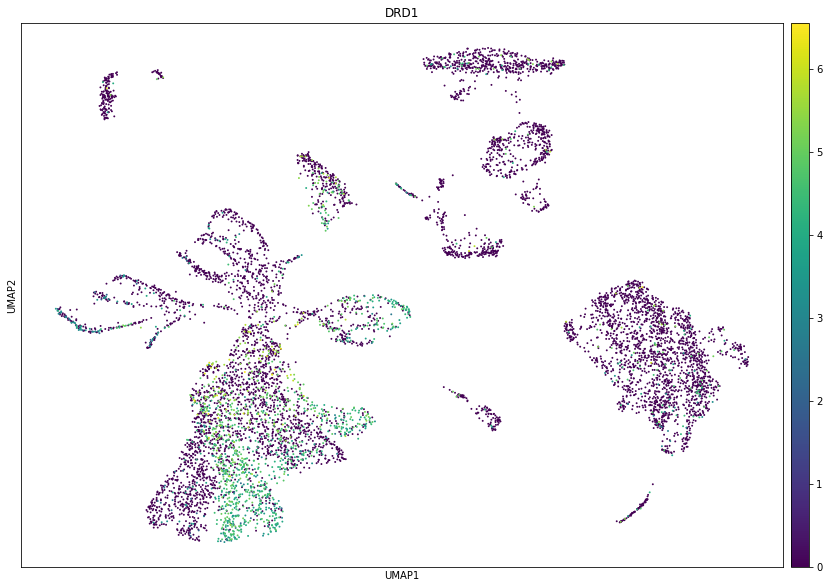

In [71]:
sc.pl.umap(striatum_ann,color="DRD1")

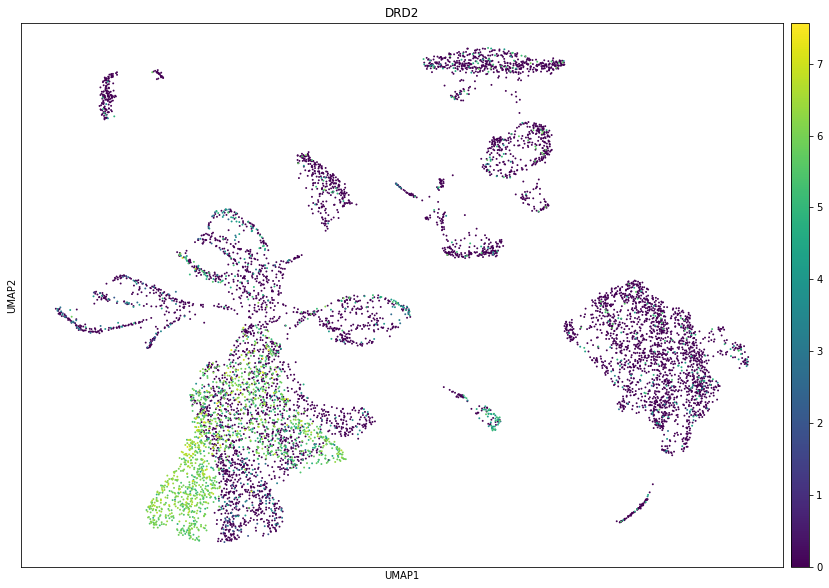

In [72]:
sc.pl.umap(striatum_ann,color="DRD2")

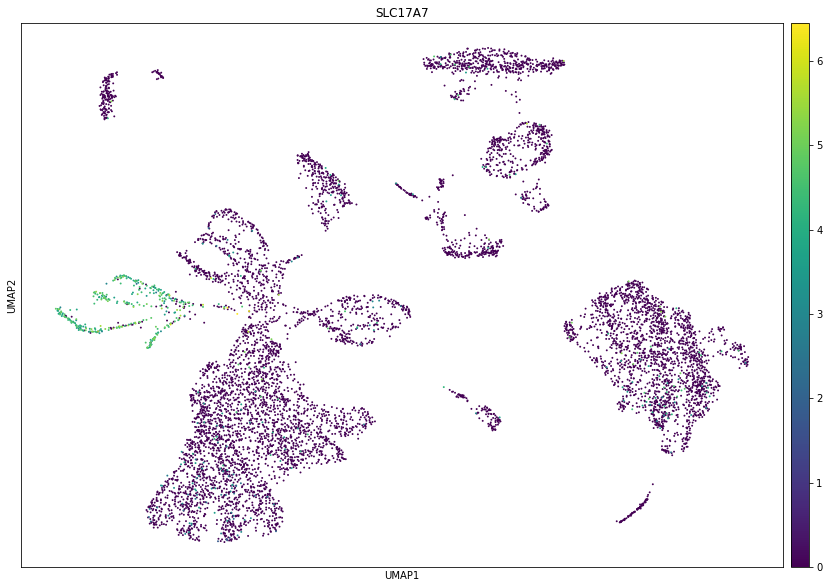

In [80]:
sc.pl.umap(striatum_ann,color="SLC17A7")

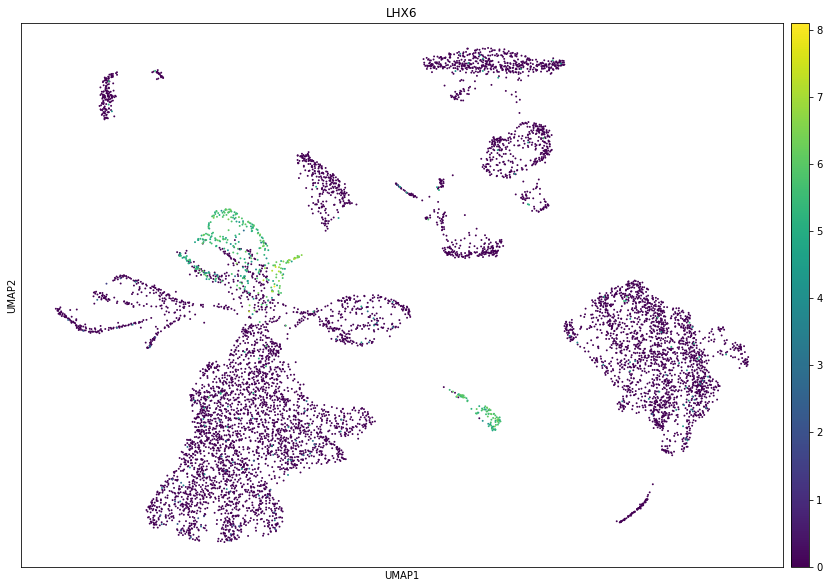

In [82]:
sc.pl.umap(striatum_ann,color="LHX6")

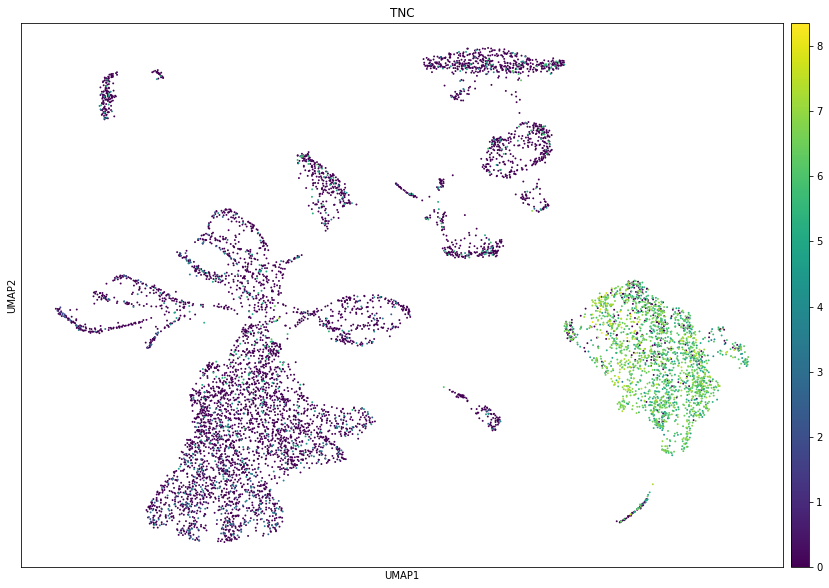

In [83]:
sc.pl.umap(striatum_ann,color="TNC")

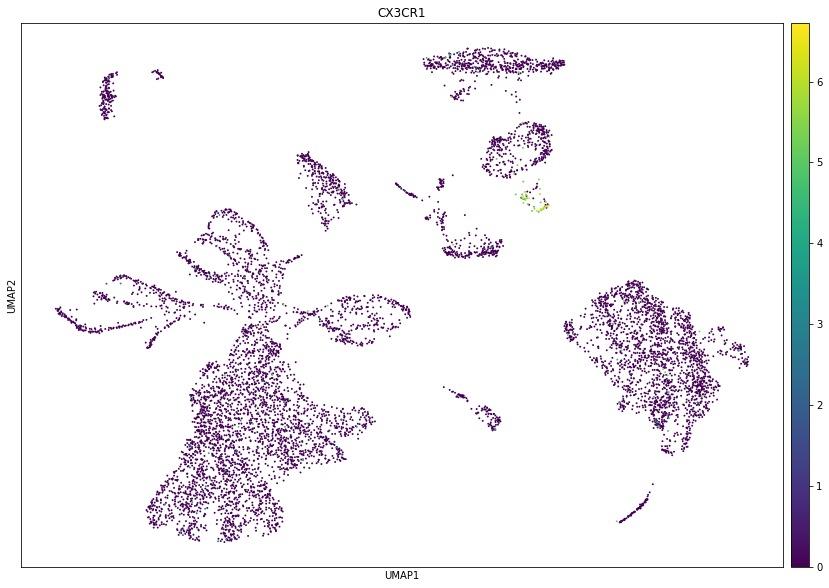

In [84]:
sc.pl.umap(striatum_ann,color="CX3CR1")

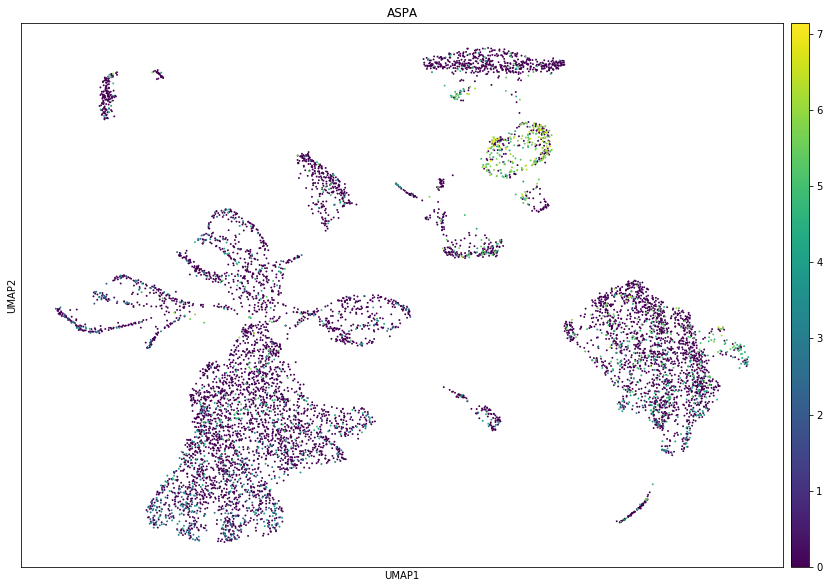

In [85]:
sc.pl.umap(striatum_ann,color="ASPA")

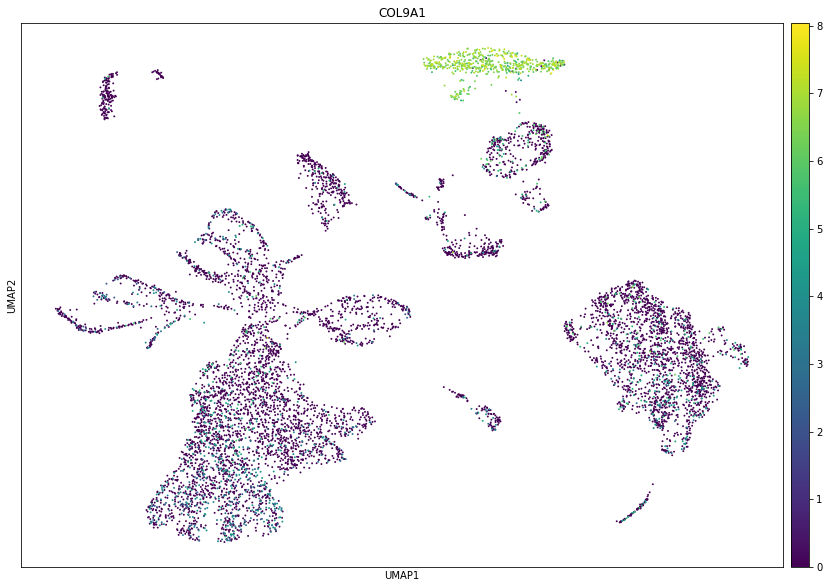

In [86]:
sc.pl.umap(striatum_ann,color="COL9A1")

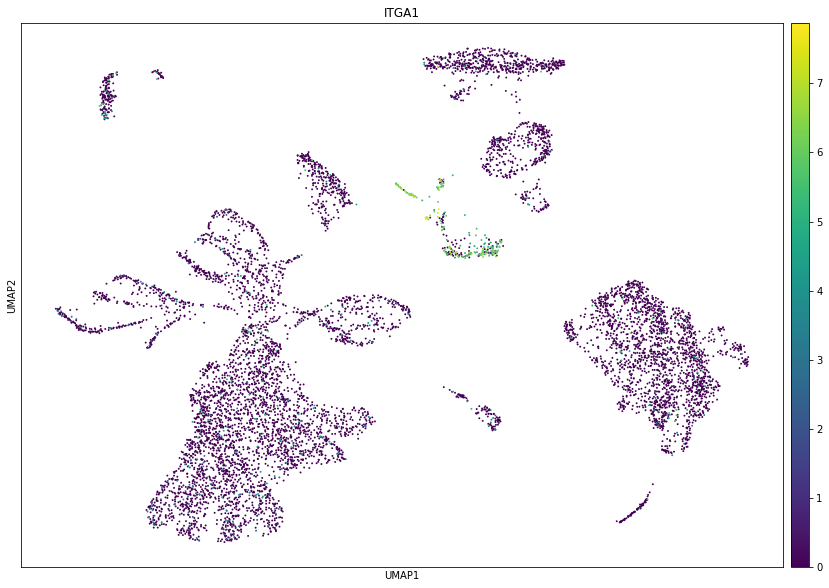

In [87]:
sc.pl.umap(striatum_ann,color="ITGA1")

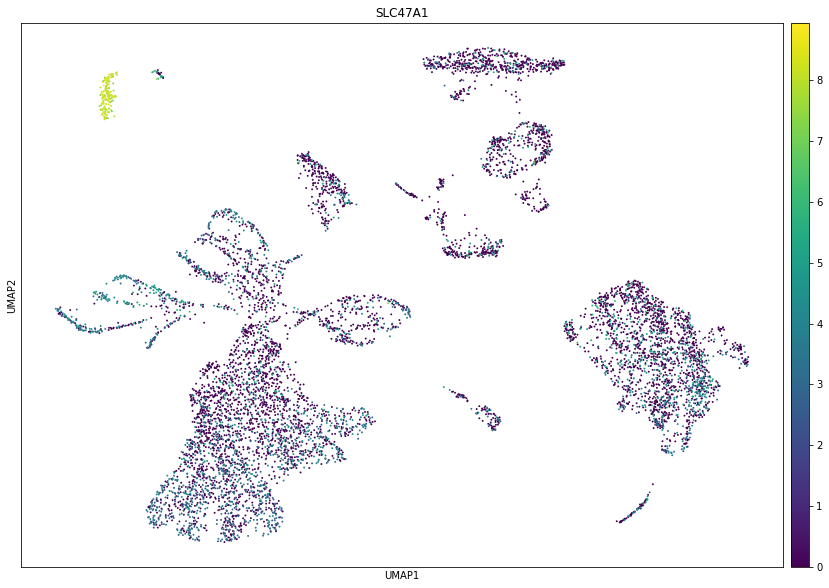

In [88]:
sc.pl.umap(striatum_ann,color="SLC47A1")